In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mu = [0, 0]
sigma = [[5, 3], [3, 5]]  # must be positive semi-definite
n = 1000
x = np.random.multivariate_normal(mu, sigma, size=n).T

Decorrolating Data

Text(0.5,1,'Raw Data')

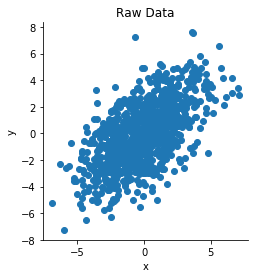

In [22]:
fig, ax = plt.subplots()
ax.scatter(x[0], x[1])
ax.set_aspect("equal")
#ax.set_xlim(-8, 8)
#ax.set_ylim(-8, 8)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Raw Data")

In [23]:
U, S, Vt = np.linalg.svd(x)
print(np.cov(x))

[[4.92635274 3.06367547]
 [3.06367547 5.23119313]]


In [24]:
xt = np.dot(U, x)

Text(0.5,1,'Decorrolated')

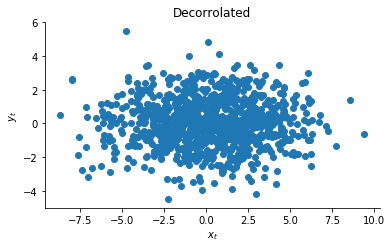

In [25]:
fig, ax = plt.subplots()
ax.scatter(xt[0], xt[1])#, s=20, alpha=0.2)
ax.set_aspect("equal")
#ax.set_xlim(-8, 8)
#ax.set_ylim(-8, 8)
ax.set_xlabel("$x_t$")
ax.set_ylabel("$y_t$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Decorrolated")

In [26]:
np.cov(xt)

array([[ 8.14623431e+00, -4.47509881e-03],
       [-4.47509881e-03,  2.01131156e+00]])

In [35]:
inv = np.diag(1/S + 1e-5)
xp = np.dot(inv, np.dot(U, x))

Text(0.5,1,'PCA Whitened')

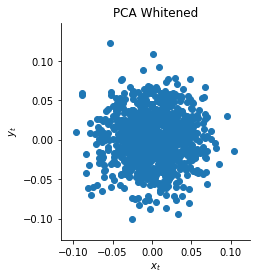

In [39]:
fig, ax = plt.subplots()
ax.scatter(xp[0], xp[1])#, s=20, alpha=0.2)
ax.set_aspect("equal")
#ax.set_xlim(-8, 8)
#ax.set_ylim(-8, 8)
ax.set_xlabel("$x_t$")
ax.set_ylabel("$y_t$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("PCA Whitened")

In [37]:
np.cov(xp)

array([[ 1.00129907e-03, -1.10688490e-06],
       [-1.10688490e-06,  1.00108766e-03]])

ZCA vs PCA example

Adapted from https://cbrnr.github.io/2018/12/17/whitening-pca-zca/

In [42]:
set1 = np.argsort(np.linalg.norm(x, axis=0))[-20:]
set2 = list(set(range(n))-set(set1))

Text(0.5,1,'Original Dataset with Highlights')

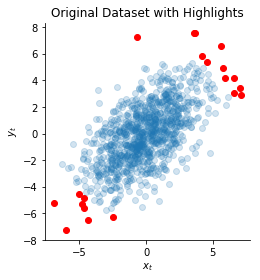

In [49]:
fig, ax = plt.subplots()
ax.scatter(x[0, set1], x[1, set1], c="red")
ax.scatter(x[0, set2], x[1, set2], alpha=0.2)
ax.set_aspect("equal")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Original Dataset with Highlights")

Text(0.5,1,'PCA Whitening')

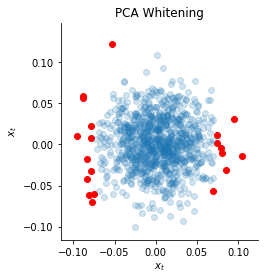

In [52]:
fig, ax = plt.subplots()
ax.scatter(xp[0, set1], xp[1, set1],c="red")
ax.scatter(xp[0, set2], xp[1, set2], alpha=0.2)
ax.set_aspect("equal")
ax.set_xlabel("$x_t$")
ax.set_ylabel("$x_t$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("PCA Whitening")

In [53]:
inv = np.diag(1/S + 1e-5)
xz = U @ np.dot(inv, np.dot(U, x))

Text(0.5,1,'ZCA Whitening')

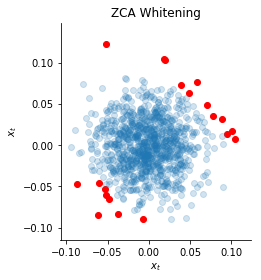

In [55]:
fig, ax = plt.subplots()
ax.scatter(xz[0, set1], xz[1, set1],c="red")
ax.scatter(xz[0, set2], xz[1, set2], alpha=0.2)
ax.set_aspect("equal")
ax.set_xlabel("$x_t$")
ax.set_ylabel("$x_t$")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("ZCA Whitening")